# Credit to GDP

## Packages

### Libraries

In [177]:
import sys
import os
import pandas as pd
import numpy as np
import time
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta

# For creating cool charts :)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib import image
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates
from highlight_text import ax_text


# We load pre-defined functions, fonts and stylesheet.
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import *

path = [x for x in sys.path if "utils" in x][0]

# Optional for TUKAN's mplstylesheet
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

In [178]:
# Spanish
import locale
locale.setlocale(locale.LC_ALL, 'es_es')

'es_es'

### Customized functions

In [179]:
# Filter dataframe by date range or for two specific dates
def date_selection(data_frame,first_date,last_date,inbewtween):
    if inbewtween==True:
        data_frame = data_frame[(data_frame["date"] >= first_date) & (data_frame["date"] <= last_date)].reset_index(drop = True)
    else:
        data_frame = data_frame[(data_frame["date"] == first_date) | (data_frame["date"] == last_date)].reset_index(drop = True)
    return(data_frame)

# Return last date for any dataframe with a 'date' columns
def last_date(dataframe):
    x= dataframe['date'].tail(1).dt.strftime('%Y-%m-%d').to_string()[-10:]
    return(x)

### Fonts

In [180]:
#n Load new fonts
# Load the Comfortaa style

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Teko\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Dosis\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

## Data

### Payload

In [181]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "geography"
    ],
    "categories": {
        "geography": "all"
    },
    "request": [
        {
            "table": "wd_bis_credit_to_gdp",
            "variables": [
                "beeaa620fbb21f5",
                "334b327f0959a1b"
            ]
        }
    ],
    "from": "1994-01-10"
}
response = get_tukan_api_request(payload)
data = response["data"]
data

Success getting the data


,date,geography__ref,geography,334b327f0959a1b,beeaa620fbb21f5
0,1998-01-01,17ab9f12c3576a6,Grecia,1.750000e+11,1.399
1,1998-01-01,1a4c623ea10d158,Singapur,1.820000e+11,1.967
2,1998-01-01,31dd4e813008b8b,España,8.650000e+11,1.544
3,1998-01-01,49fa083f558d3cd,India,4.650000e+11,1.193
4,1998-01-01,4ab74c648589726,Hungría,4.800000e+10,1.104
...,...,...,...,...,...
3989,2021-07-01,e6f8c8e95dbd8e9,Rusia,2.057000e+12,1.222
3990,2021-07-01,e7f97f162f2d08a,Estados Unidos de América,6.287600e+13,2.811
3991,2021-07-01,f52fb619ed75ad0,Turquía,8.340000e+11,1.156
3992,2021-07-01,f67b5a0070019e4,Francia,1.021400e+13,3.611


In [194]:
latam = ['México','Argentina','Brasil','Chile','Colombia']
latam_data = data[data["geography"].isin(latam)].reset_index(drop=True)
latam_data = latam_data[latam_data['date']==latam_data['date'].max()]
latam_data

,date,geography__ref,geography,334b327f0959a1b,beeaa620fbb21f5
470,2021-07-01,6defdef36fe806f,Argentina,4.510000e+11,1.085
471,2021-07-01,79d5f0f31f18878,Colombia,3.800000e+11,1.288
472,2021-07-01,8509dab50907542,Chile,5.410000e+11,1.883
473,2021-07-01,b815762a2c6a283,México,1.031000e+12,0.824
474,2021-07-01,fe1e597682a8db5,Brasil,2.845000e+12,1.824


## Plots

### MEX

d:\TUKAN\tukan_notebooks\notebook_venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


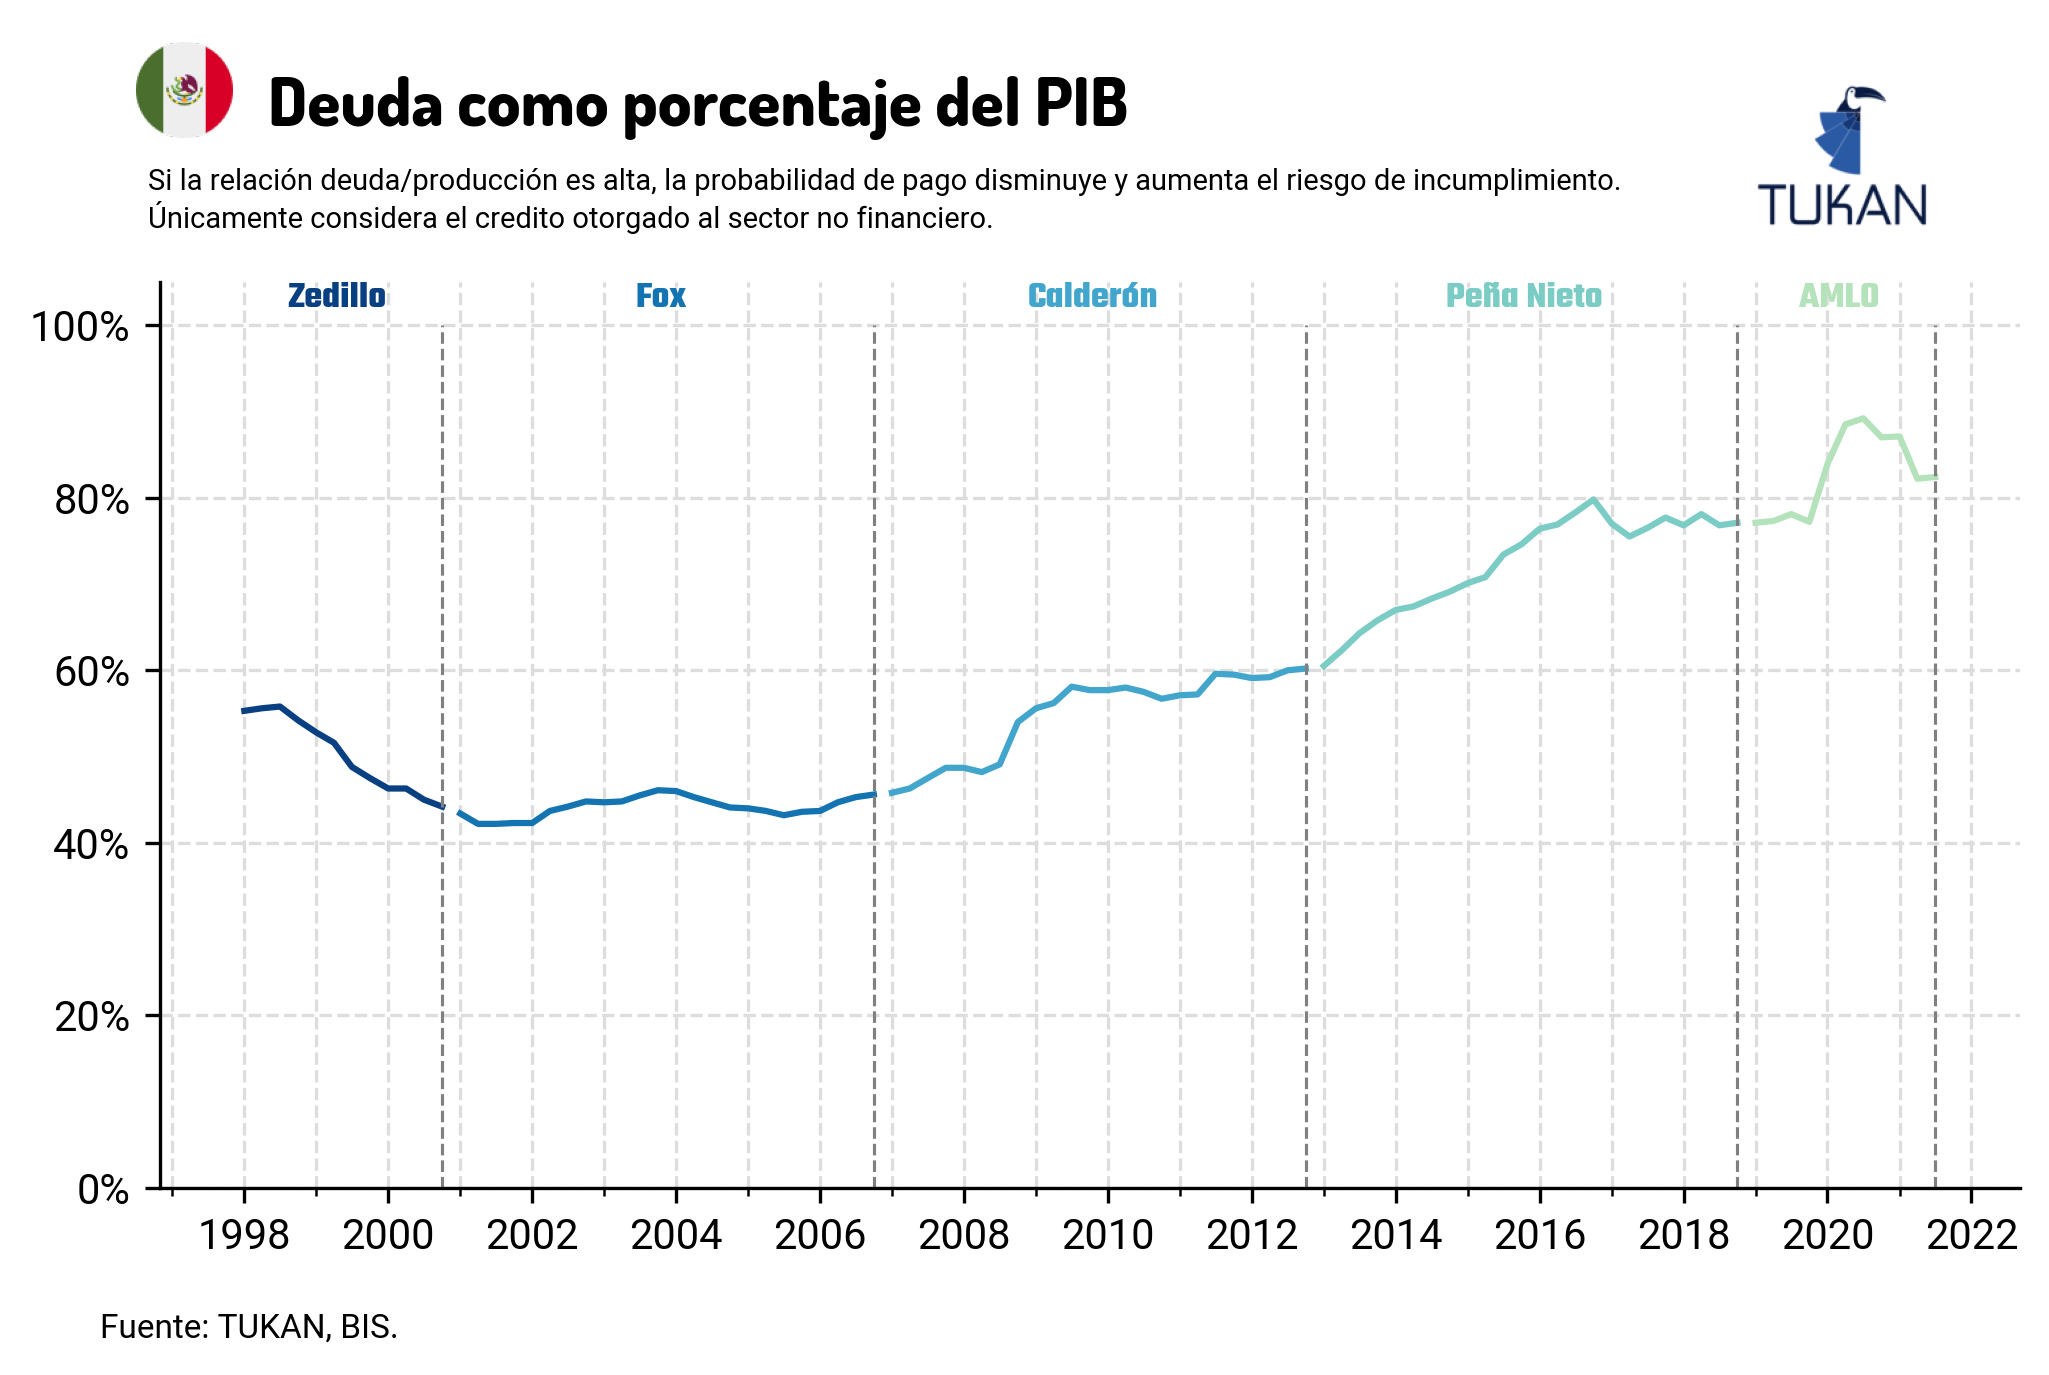

In [183]:
plot_data = data[data["geography"]=='México']
plot_data["president"] = ["Zedillo" if x < datetime(2000,12,1) else "Fox" if x < datetime(2006,12,1) else "Calderón" if x < datetime(2012,12,1) else "Peña Nieto" if x < datetime(2018,12,1) else "AMLO" for x in plot_data["date"]]

fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

cmap = mpl.cm.get_cmap("GnBu_r", 5)

# Data to plot
# ax.plot(plot_data['date'],plot_data['beeaa620fbb21f5'])
presidents = list(plot_data["president"].unique())

cmap = mpl.cm.get_cmap("GnBu_r", len(presidents) + 2)

for index, x in enumerate(presidents):
    ax.plot(plot_data[plot_data["president"] == x]["date"], plot_data[plot_data["president"] == x]["beeaa620fbb21f5"], color = cmap(index))

    X_max = plot_data[plot_data["president"] == x]["date"].max()
    X_min = plot_data[plot_data["president"] == x]["date"].min()
    center_date = X_min + ((X_max - relativedelta(months=2)) - X_min)/2

    ax.vlines(X_max, ymin = 0, ymax = 1, color = "gray", ls = "--", lw = .75)
    ax_text(x = center_date, y = 1.05,
            s = f"<{x}>",
            highlight_textprops=[{"color": cmap(index)}] ,
            ax = ax, weight = "bold", font = "Teko", ha = "center", size = 9)
 

# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0%}'))

# ax.set_yticks([30,60])


ax.set_ylim(0)

icon_icon = image.imread(module_path +"\\assets\\flags\\mx.png")
icon_ax = fig.add_axes([0.11, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_icon)
icon_ax.axis("off")


# Add title and subtitle
fig.text(
    0.17,
    1.01,
    "Deuda como porcentaje del PIB",
    size=16,
    weight = "bold",
    family = "Dosis"
)

fig.text(
    0.12,
    0.925,
    "Si la relación deuda/producción es alta, la probabilidad de pago disminuye y aumenta el riesgo de incumplimiento.\nÚnicamente considera el credito otorgado al sector no financiero.",
    size=7
)

# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, BIS.", fontsize=8)

# Save plot with TUKAN logo, transparent and white
# plt.savefig(
#     "plots/mex_credit_to_gdp_no_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.7, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

# plt.savefig(
#     "plots/mex_credit_to_gdp_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

plt.savefig(
    "plots/mex_credit_to_gdp_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


### USA & CAN

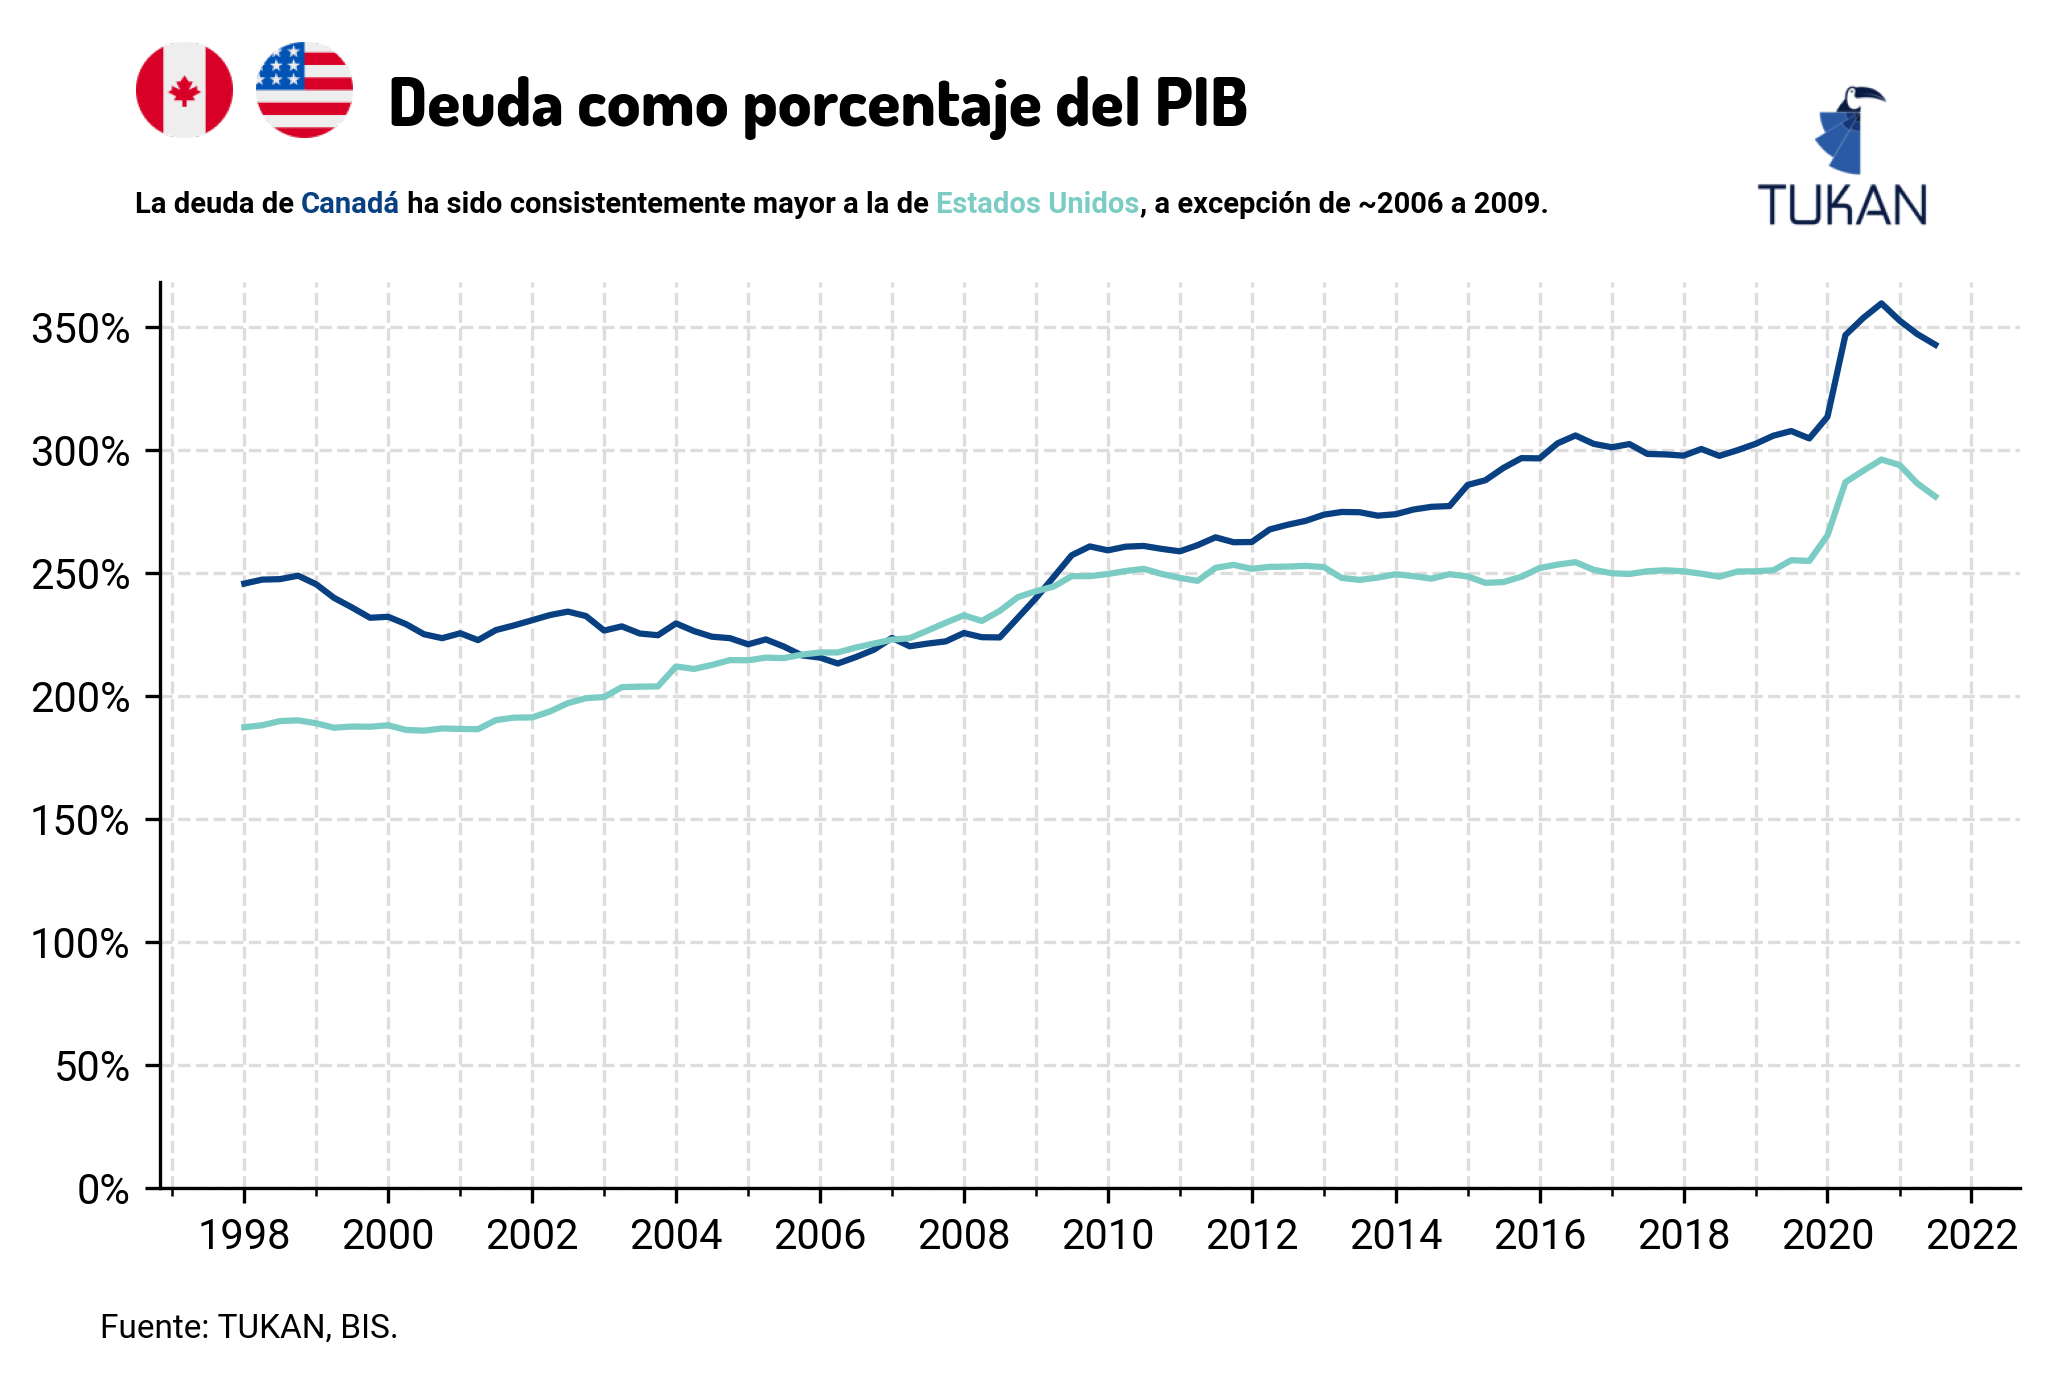

In [184]:
plot_data = data[(data["geography"]=='Estados Unidos de América') | (data["geography"]=='Canadá')]

fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

cmap = mpl.cm.get_cmap("GnBu_r", 5)

# Data to plot
aux_count = 0
for i in plot_data['geography'].unique().tolist():
    aux_data = plot_data[plot_data['geography']==i]
    ax.plot(aux_data["date"], aux_data["beeaa620fbb21f5"], color = cmap(aux_count))
    aux_count += 2
 

# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0%}'))

# ax.set_yticks([30,60])


ax.set_ylim(0)

icon_1 = image.imread(module_path +"\\assets\\flags\\ca.png")
icon_ax = fig.add_axes([0.11, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_1)
icon_ax.axis("off")

icon_2 = image.imread(module_path +"\\assets\\flags\\us.png")
icon_ax = fig.add_axes([0.16, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_2)
icon_ax.axis("off")


# Add title and subtitle
fig.text(
    0.22,
    1.01,
    "Deuda como porcentaje del PIB",
    size=16,
    weight = "bold",
    family = "Dosis"
)

# ax_title.axis("off")


subtitle = f"La deuda de <Canadá> ha sido consistentemente mayor a la de <Estados Unidos>, a excepción de ~2006 a 2009."
ax_text(x = -90, y = 110,
    s = subtitle,
    highlight_textprops=[{"color": cmap(0)},{"color": cmap(2)}], 
                        weight = "bold", size = 7)



# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, BIS.", fontsize=8)

# Save plot with TUKAN logo, transparent and white
# plt.savefig(
#     "plots/can_usa_credit_to_gdp_no_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.7, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

# plt.savefig(
#     "plots/can_usa_credit_to_gdp_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

plt.savefig(
    "plots/can_usa_credit_to_gdp_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


### USA, CAN & MEX

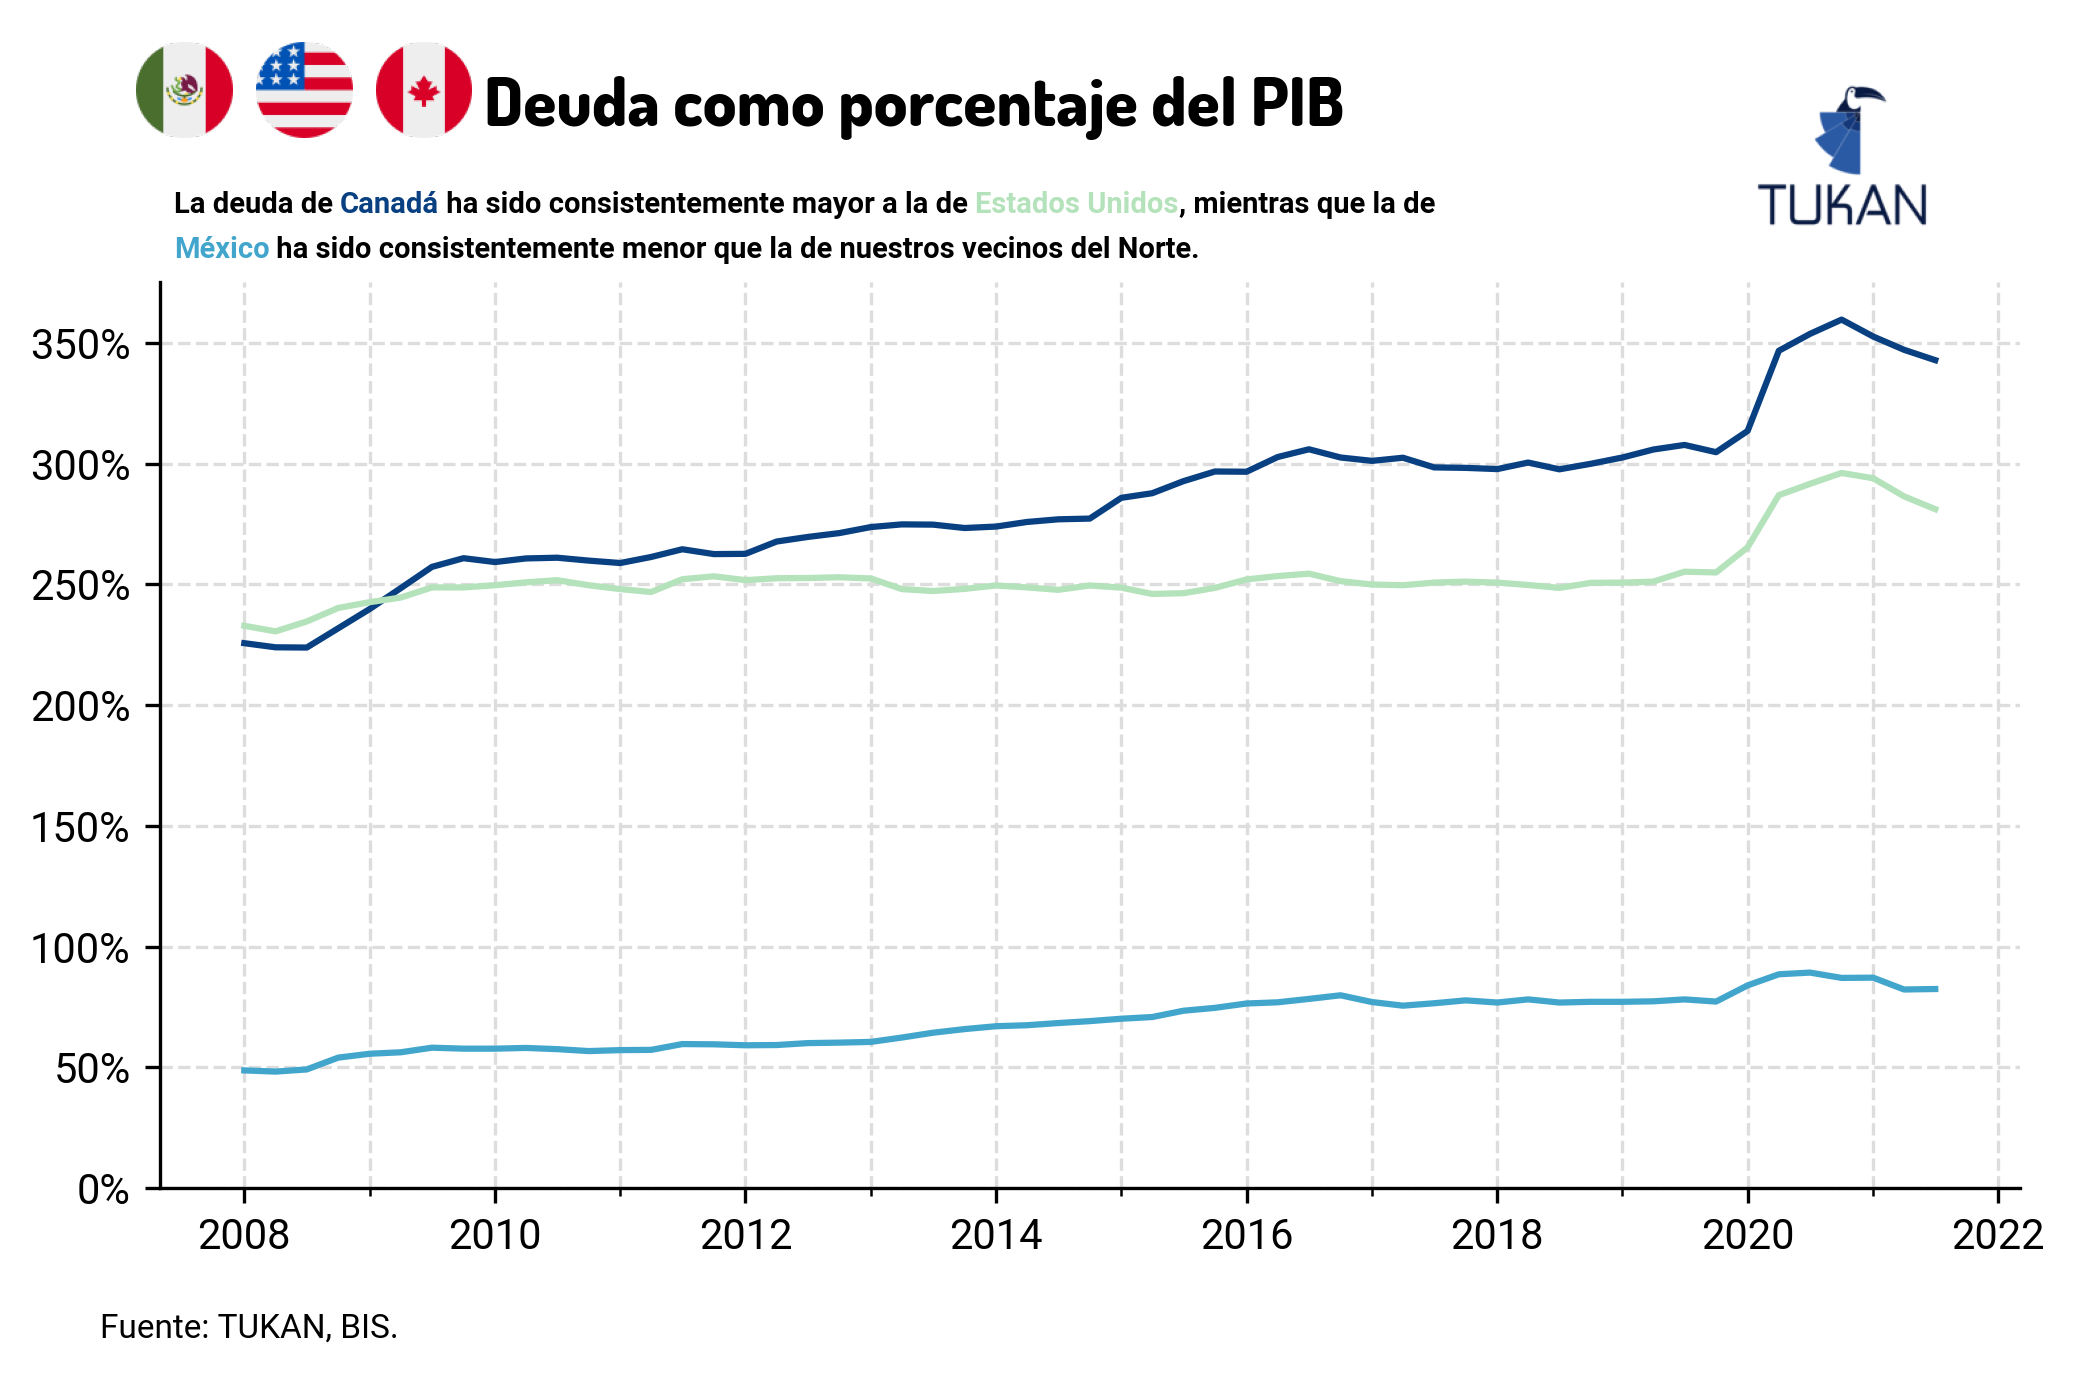

In [193]:
plot_data = data[(data["geography"]=='Estados Unidos de América') | (data["geography"]=='Canadá')| (data["geography"]=='México')]
plot_data = plot_data[plot_data['date']>="2008-01-01"]
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

cmap = mpl.cm.get_cmap("GnBu_r", 10)

# Data to plot
aux_count = 0
for i in plot_data['geography'].unique().tolist():
    aux_data = plot_data[plot_data['geography']==i]
    ax.plot(aux_data["date"], aux_data["beeaa620fbb21f5"], color = cmap(aux_count))
    aux_count += 3
 

# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0%}'))

# ax.set_yticks([30,60])


ax.set_ylim(0)

icon_1 = image.imread(module_path +"\\assets\\flags\\mx.png")
icon_ax = fig.add_axes([0.11, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_1)
icon_ax.axis("off")

icon_2 = image.imread(module_path +"\\assets\\flags\\us.png")
icon_ax = fig.add_axes([0.16, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_2)
icon_ax.axis("off")

icon_3 = image.imread(module_path +"\\assets\\flags\\ca.png")
icon_ax = fig.add_axes([0.21, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_3)
icon_ax.axis("off")


# Add title and subtitle
fig.text(
    0.26,
    1.01,
    "Deuda como porcentaje del PIB",
    size=16,
    weight = "bold",
    family = "Dosis"
)

# ax_title.axis("off")


subtitle = f"La deuda de <Canadá> ha sido consistentemente mayor a la de <Estados Unidos>, mientras que la de\n<México> ha sido consistentemente menor que la de nuestros vecinos del Norte."
ax_text(x = -150, y = 110,
    s = subtitle,
    highlight_textprops=[{"color": cmap(0)},{"color": cmap(6)},{"color": cmap(3)}], 
                        weight = "bold", size = 7)



# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, BIS.", fontsize=8)

# Save plot with TUKAN logo, transparent and white
# plt.savefig(
#     "plots/tmec_credit_to_gdp_no_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.7, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

# plt.savefig(
#     "plots/tmec_credit_to_gdp_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

plt.savefig(
    "plots/tmec_credit_to_gdp_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


### LATAM

In [186]:
plot_data = data[(data["geography"]=='Argentina') | (data["geography"]=='Brasil')| (data["geography"]=='Chile')| (data["geography"]=='Colombia')]
plot_data['geography'].unique().tolist()

['Argentina', 'Colombia', 'Chile', 'Brasil']

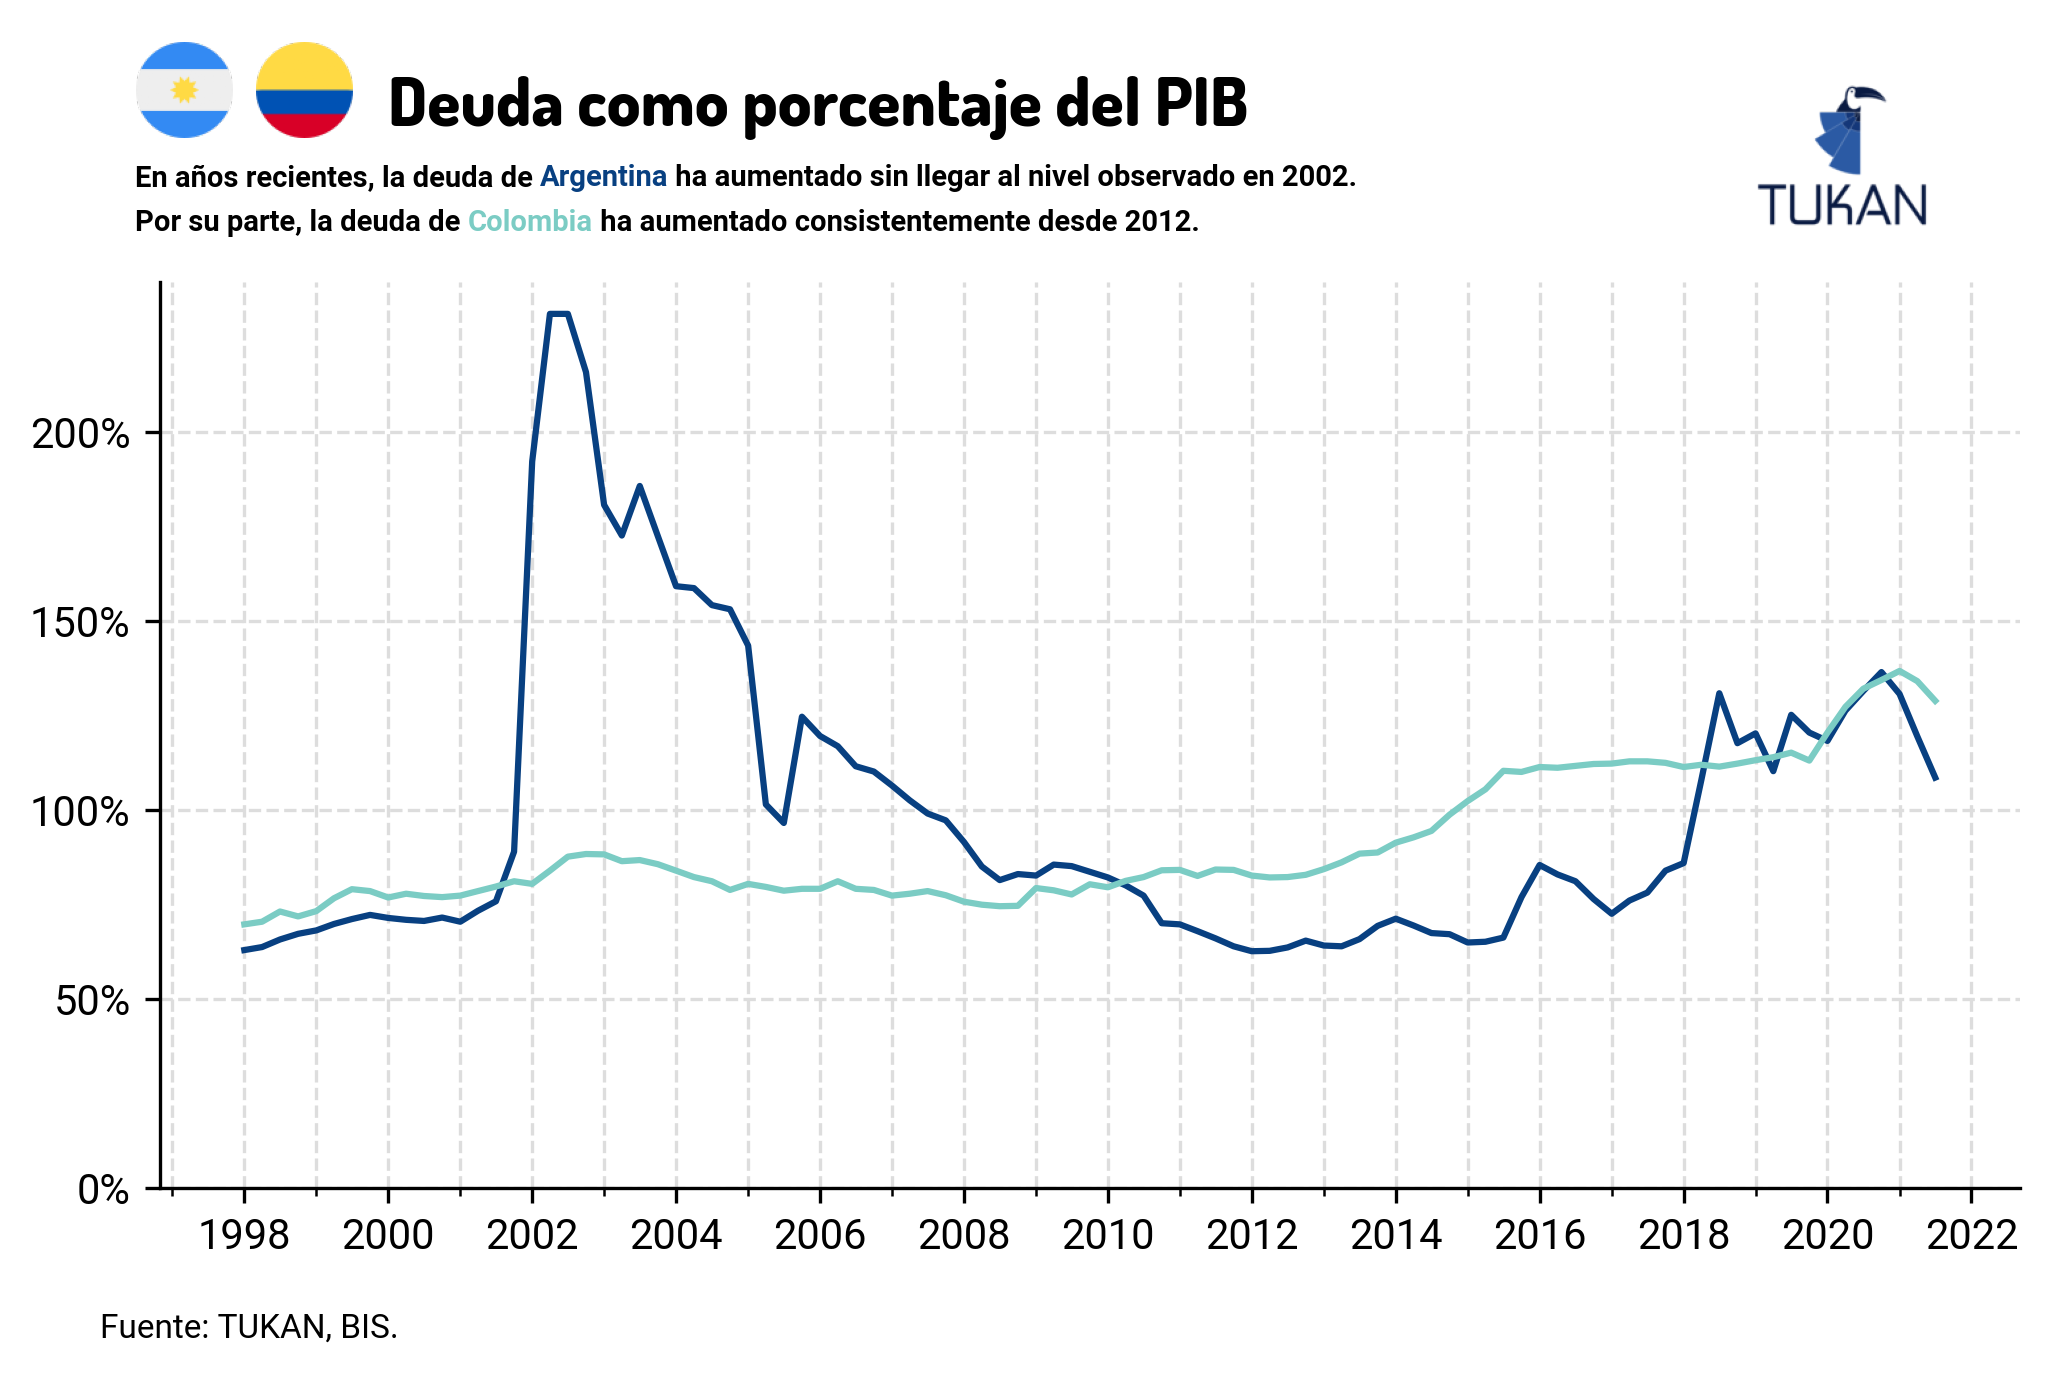

In [187]:
plot_data = data[(data["geography"]=='Argentina') | (data["geography"]=='Colombia')]

fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

cmap = mpl.cm.get_cmap("GnBu_r", 5)

# Data to plot
aux_count = 0
for i in plot_data['geography'].unique().tolist():
    aux_data = plot_data[plot_data['geography']==i]
    ax.plot(aux_data["date"], aux_data["beeaa620fbb21f5"], color = cmap(aux_count))
    aux_count += 2
 

# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0%}'))

# ax.set_yticks([30,60])


ax.set_ylim(0)

icon_1 = image.imread(module_path +"\\assets\\flags\\ar.png")
icon_ax = fig.add_axes([0.11, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_1)
icon_ax.axis("off")

icon_2 = image.imread(module_path +"\\assets\\flags\\co.png")
icon_ax = fig.add_axes([0.16, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_2)
icon_ax.axis("off")



# Add title and subtitle
fig.text(
    0.22,
    1.01,
    "Deuda como porcentaje del PIB",
    size=16,
    weight = "bold",
    family = "Dosis"
)

# ax_title.axis("off")


subtitle = f"En años recientes, la deuda de <Argentina> ha aumentado sin llegar al nivel observado en 2002.\nPor su parte, la deuda de <Colombia> ha aumentado consistentemente desde 2012."
ax_text(x = -90, y = 90,
    s = subtitle,
    highlight_textprops=[{"color": cmap(0)},{"color": cmap(2)}], 
                        weight = "bold", size = 7)



# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, BIS.", fontsize=8)

# Save plot with TUKAN logo, transparent and white
# plt.savefig(
#     "plots/arg_col_credit_to_gdp_no_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.7, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

# plt.savefig(
#     "plots/arg_col_credit_to_gdp_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

plt.savefig(
    "plots/arg_col_credit_to_gdp_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


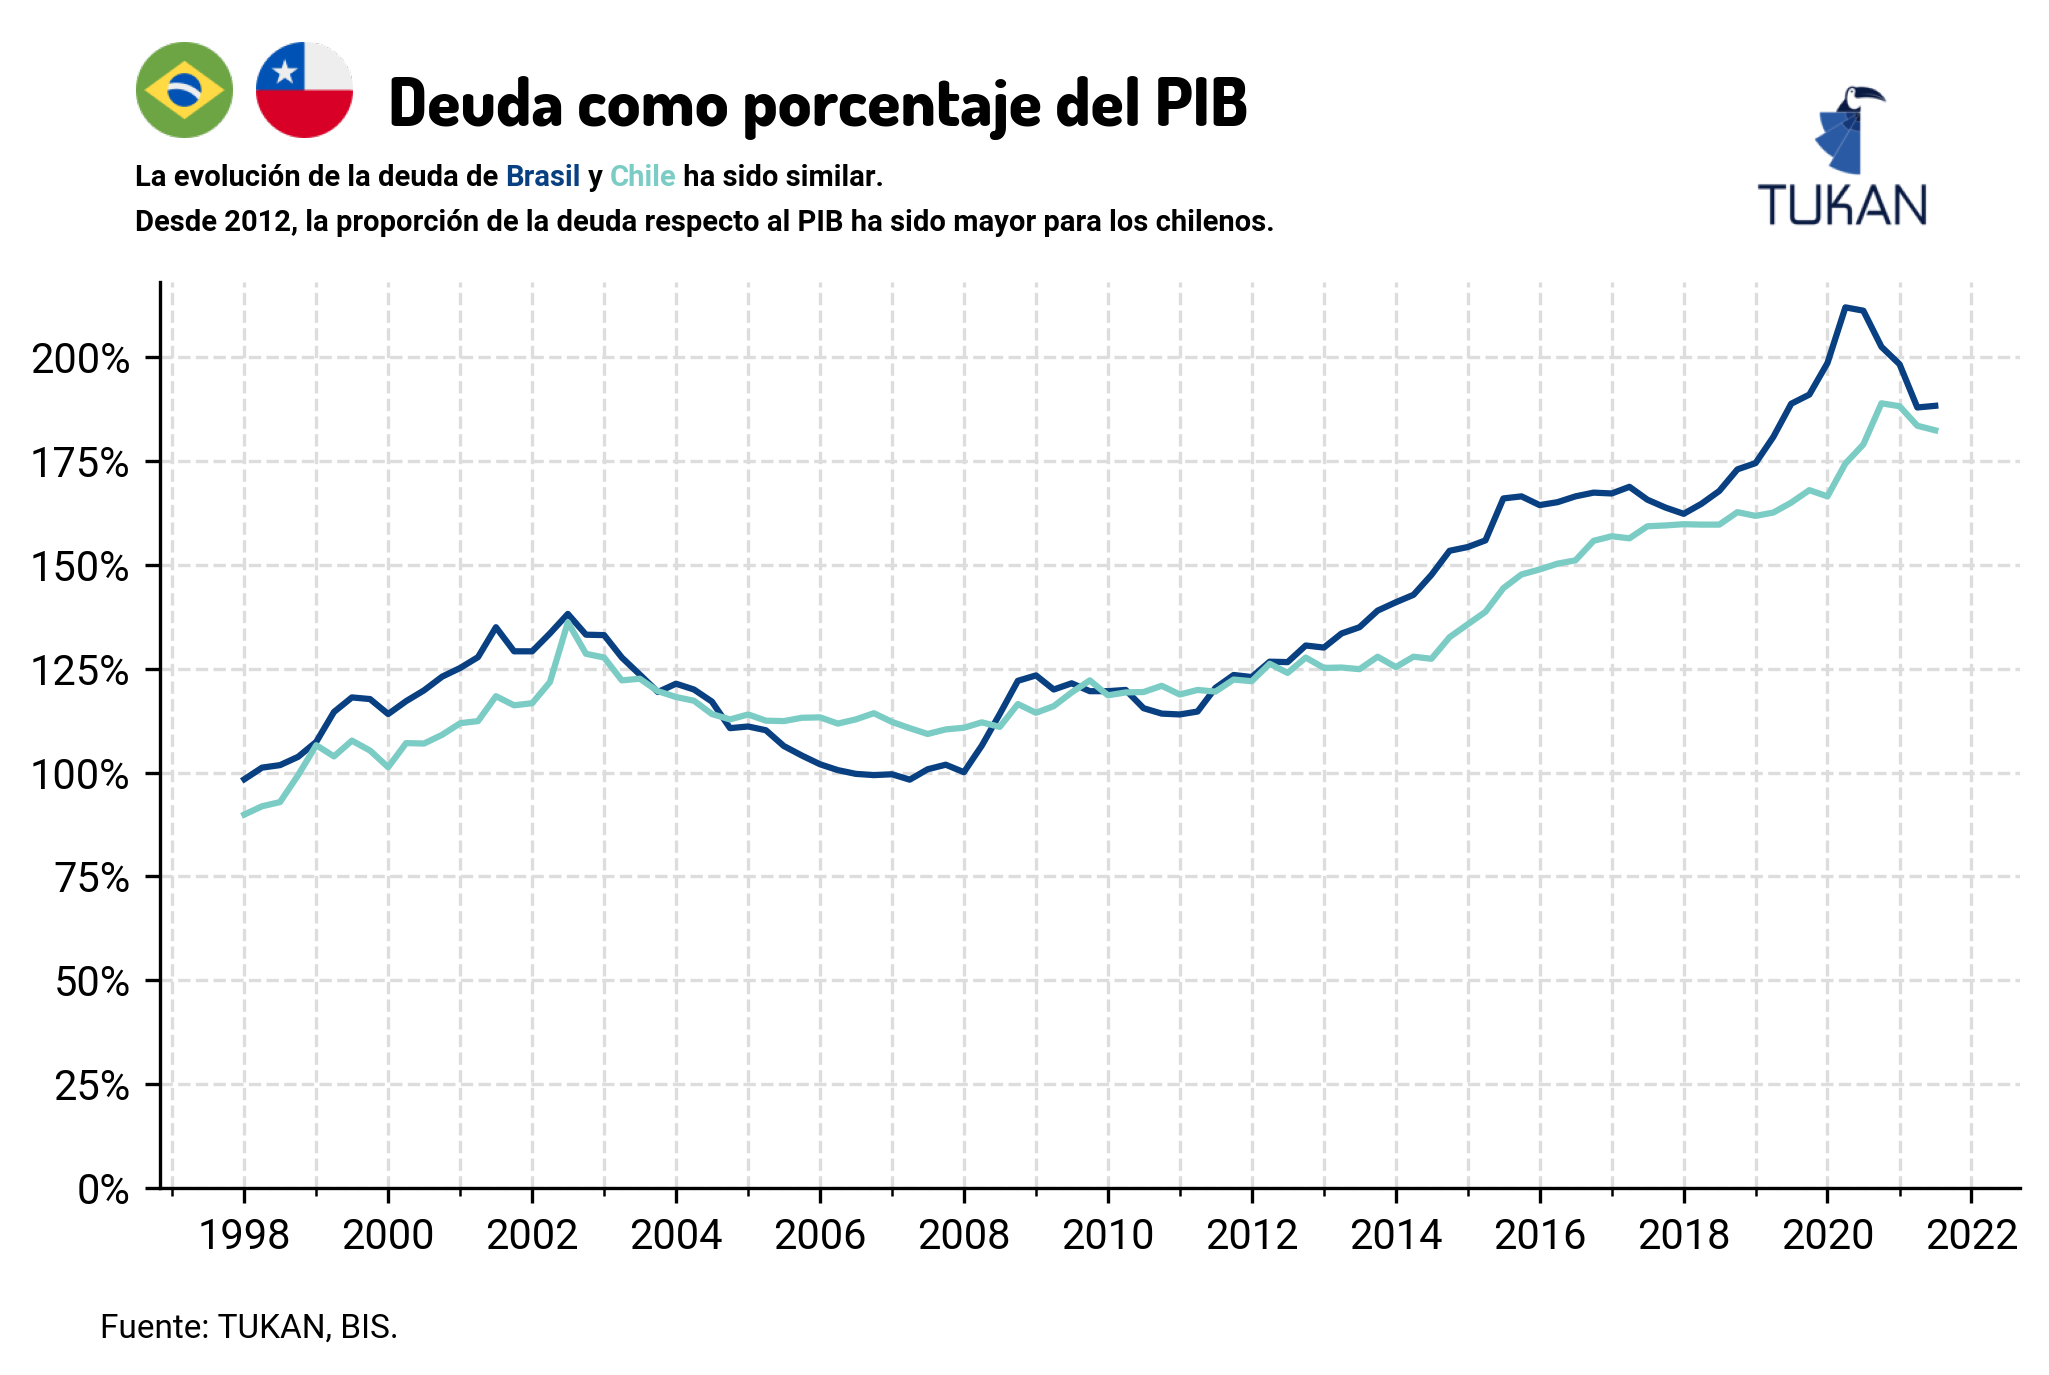

In [188]:
plot_data = data[(data["geography"]=='Brasil') | (data["geography"]=='Chile')]

fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

cmap = mpl.cm.get_cmap("GnBu_r", 5)

# Data to plot
aux_count = 0
for i in plot_data['geography'].unique().tolist():
    aux_data = plot_data[plot_data['geography']==i]
    ax.plot(aux_data["date"], aux_data["beeaa620fbb21f5"], color = cmap(aux_count))
    aux_count += 2
 

# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0%}'))

# ax.set_yticks([30,60])


ax.set_ylim(0)

icon_1 = image.imread(module_path +"\\assets\\flags\\br.png")
icon_ax = fig.add_axes([0.11, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_1)
icon_ax.axis("off")

icon_2 = image.imread(module_path +"\\assets\\flags\\cl.png")
icon_ax = fig.add_axes([0.16, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_2)
icon_ax.axis("off")



# Add title and subtitle
fig.text(
    0.22,
    1.01,
    "Deuda como porcentaje del PIB",
    size=16,
    weight = "bold",
    family = "Dosis"
)

# ax_title.axis("off")


subtitle = f"La evolución de la deuda de <Brasil> y <Chile> ha sido similar.\nDesde 2012, la proporción de la deuda respecto al PIB ha sido mayor para los chilenos."
ax_text(x = -90, y = 90,
    s = subtitle,
    highlight_textprops=[{"color": cmap(0)},{"color": cmap(2)}], 
                        weight = "bold", size = 7)



# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, BIS.", fontsize=8)

# Save plot with TUKAN logo, transparent and white
# plt.savefig(
#     "plots/bra_chi_credit_to_gdp_no_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.7, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

# plt.savefig(
#     "plots/bra_chi_credit_to_gdp_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

plt.savefig(
    "plots/bra_chi_credit_to_gdp_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


In [189]:
plot_data = data[(data["geography"]=='Brasil') | (data["geography"]=='Chile')]
plot_data

,date,geography__ref,geography,334b327f0959a1b,beeaa620fbb21f5
13,1998-01-01,8509dab50907542,Chile,8.100000e+10,0.984
23,1998-01-01,fe1e597682a8db5,Brasil,7.660000e+11,0.899
37,1998-04-01,8509dab50907542,Chile,8.300000e+10,1.012
47,1998-04-01,fe1e597682a8db5,Brasil,7.850000e+11,0.919
61,1998-07-01,8509dab50907542,Chile,8.400000e+10,1.018
...,...,...,...,...,...
3907,2021-01-01,fe1e597682a8db5,Brasil,2.517000e+12,1.882
3934,2021-04-01,8509dab50907542,Chile,5.570000e+11,1.879
3950,2021-04-01,fe1e597682a8db5,Brasil,2.994000e+12,1.835
3977,2021-07-01,8509dab50907542,Chile,5.410000e+11,1.883
